**This script implements a simple neural network using NumPy and includes activation functions such as linear, sigmoid, and ReLU. It also incorporates initialization techniques such as random, He, and Xavier to solve an XOR problem.**

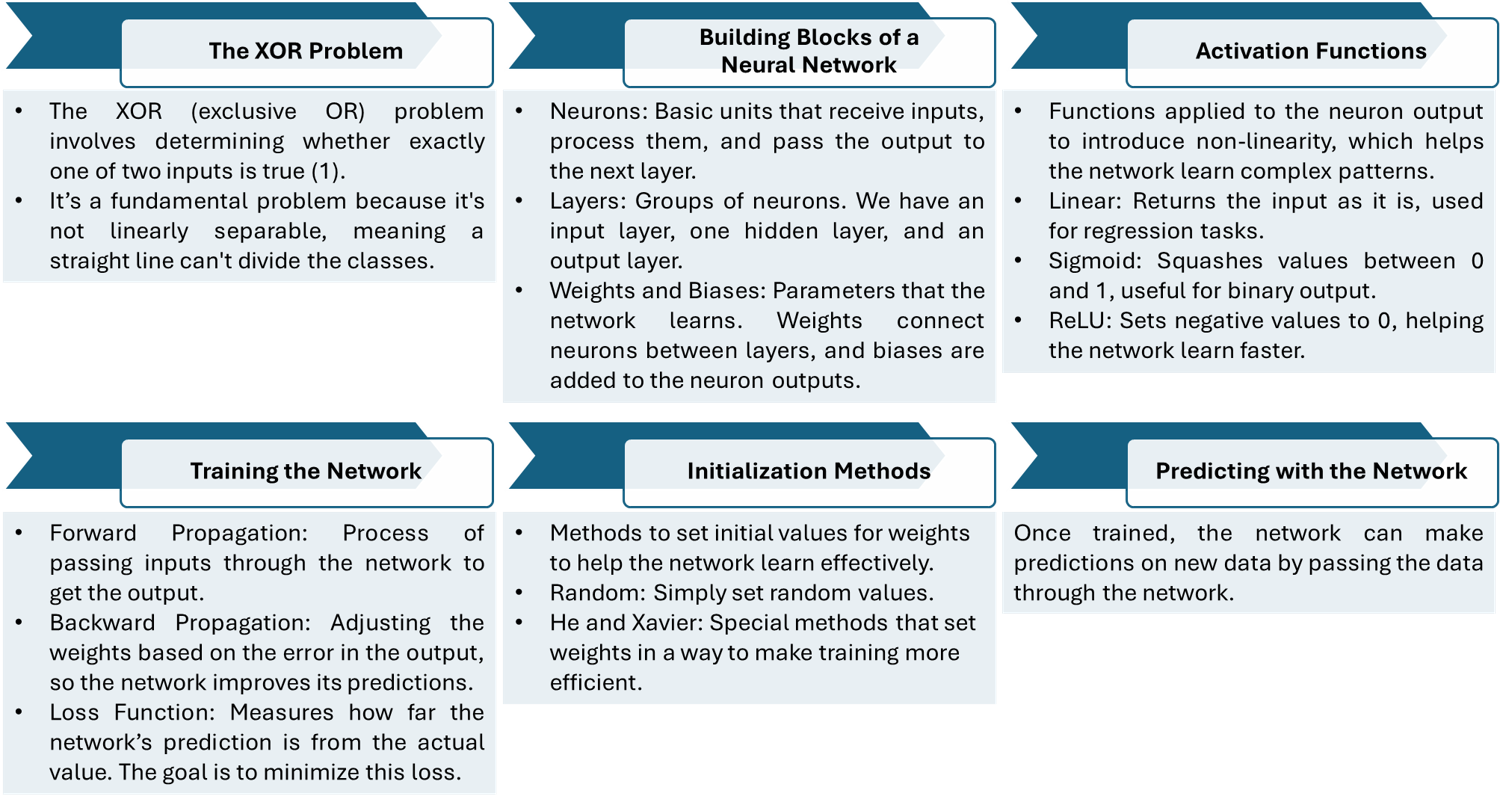

# UTILITIES

In [1]:
import numpy as np
import time

**Define the activation and the their respective derivative functions**

- Linear: Outputs the input value directly, commonly used in regression tasks.
- Sigmoid: Squashes input values to a range between 0 and 1, suitable for binary classification tasks.
- ReLU (Rectified Linear Unit): Outputs input values directly if positive, otherwise zero, helping to mitigate vanishing gradient problems.

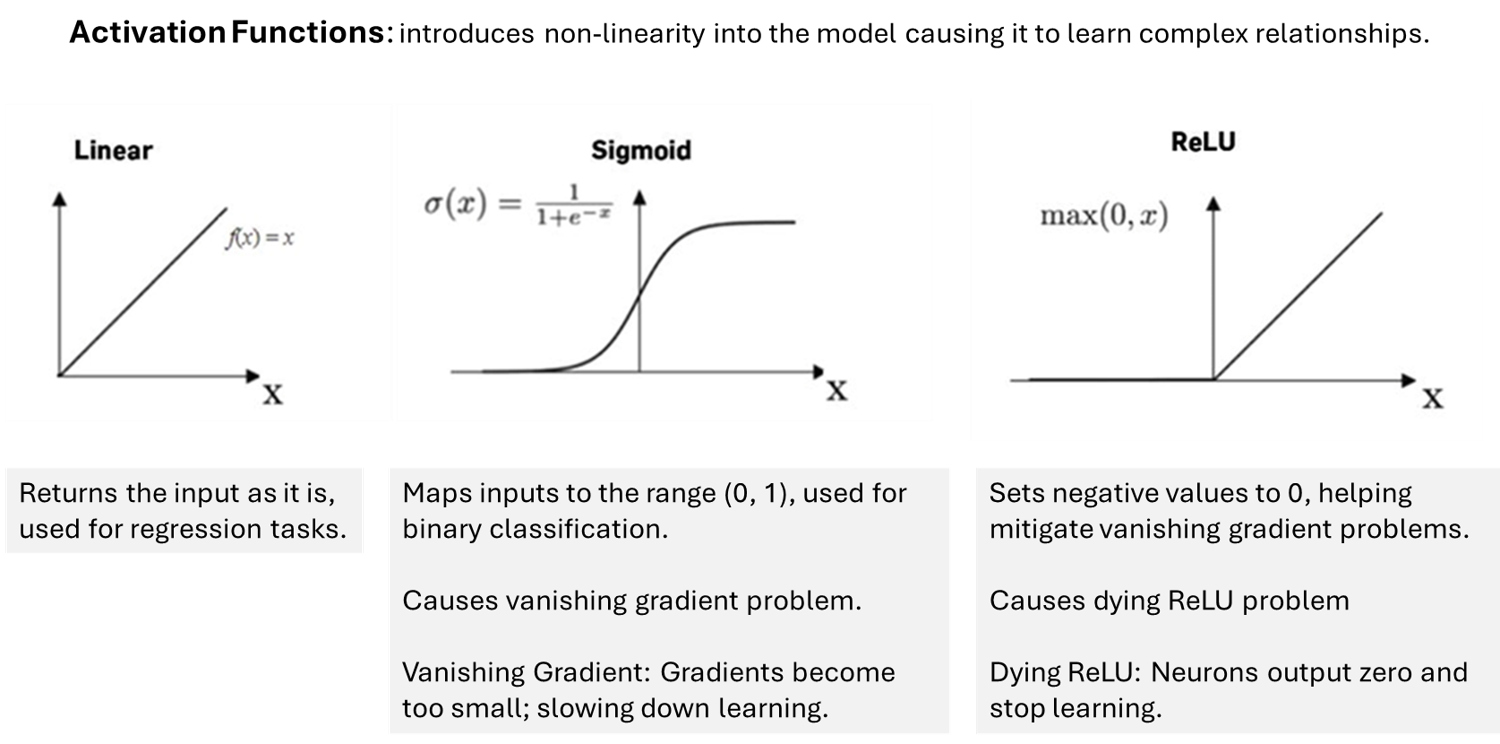

In [2]:
# Linear activation function for regression tasks.
def linear(x):
    return x

# Derivative of the linear activation function
def linear_derivative(x):
    return np.ones_like(x)

# Sigmoid activation function for binary classification tasks.
def sigmoid(x):
    # When x becomes highly negative, the exponential term in the denominator can grow enormously, resulting in overflow issues. Therefore, x is being clipped.
    clipped_x = np.clip(x, -10, 10)
    return 1 / (1 + np.exp(-clipped_x))

# Derivative of the sigmoid activation function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU (Rectified Linear Unit) activation function to mitigate vanishing and exploding gradient problem
def relu(x):
    return np.maximum(0, x)

# Derivative of the ReLU activation function
def relu_derivative(x):
    return np.where(x <= 0, 0, 1)


**Define the initialization techniques functions**

- He Initialization: Initializes weights by scaling them with the square root of 2 divided by the number of input units, optimizing performance for ReLU activation functions.

- Xavier Initialization: Initializes weights by scaling them with the square root of 1 divided by the number of input units, ensuring balanced gradients, and is suitable for sigmoid and tanh activations.

In [3]:
def initialize_parameters(input_size, hidden_size, output_size, init_type='random'):
    # Setting random seed for reproducibility
    np.random.seed(0)

    # Random initialization
    if init_type == 'random':
        # Initializing weights with random values scaled by the square root of the inverse of input size
        weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(1/input_size)
        weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(1/hidden_size)

    # He initialization
    if init_type == 'he':
        # Initializing weights with random values scaled by the square root of the inverse of half of input size
        weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(input_size/2)
        weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(hidden_size/2)

    # Xavier initialization
    if init_type == 'xavier':
        # Initializing weights with random values scaled by the square root of the inverse of the sum of input and output size
        weights_input_hidden = np.random.randn(input_size, hidden_size) * np.sqrt(2/(input_size + output_size))
        weights_hidden_output = np.random.randn(hidden_size, output_size) * np.sqrt(2/(input_size + output_size))

    # Initializing biases with zeros
    biases_input_hidden = np.zeros((1, hidden_size))
    biases_hidden_output = np.zeros((1, output_size))

    # Returning initialized weights and biases
    return weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output

In [4]:
def forward_propagation(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, activation_fn):
    # Calculate the input to the hidden layer
    hidden_input = np.dot(X, weights_input_hidden) + biases_input_hidden

    # Apply activation function to the hidden layer input
    hidden_output = activation_fn(hidden_input)

    # Calculate the input to the output layer
    output_layer_input = np.dot(hidden_output, weights_hidden_output) + biases_hidden_output

    # Apply activation function to the output layer input
    output = activation_fn(output_layer_input)

    # Return intermediate results and final output
    return hidden_input, hidden_output, output_layer_input, output

In [5]:
def backward_propagation(X, y, hidden_output, output, output_layer_input, weights_hidden_output, act_fn_der):
    # Compute the error at the output layer
    output_error = y - output

    # Compute the gradient at the output layer using the derivative of the activation function
    output_delta = output_error * act_fn_der(output)

    # Compute the error at the hidden layer by backpropagating the error from the output layer
    hidden_error = output_delta.dot(weights_hidden_output.T)

    # Compute the delta (gradient) at the hidden layer using the derivative of the activation function
    hidden_delta = hidden_error * act_fn_der(hidden_output)

    # Return the deltas for both hidden and output layers
    return hidden_delta, output_delta

In [6]:
def update_parameters(X, hidden_output, hidden_delta, output_delta, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, learning_rate):
    # Update the weights and biases of the hidden to output layer connection
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    biases_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    # Update the weights and biases of the input to hidden layer connection
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    biases_input_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

In [7]:
def train(X, y, input_size, hidden_size, output_size, epochs, learning_rate, act_fn, act_fn_der, init_type):
    # Initialize parameters
    weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output = initialize_parameters(input_size, hidden_size, output_size, init_type)

    # Print information about activation function and initialization technique
    print(f"Activation function used: {act_fn.__name__}")
    print(f"Initialization technique used: {init_type}\n")

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        hidden_input, hidden_output, output_layer_input, output = forward_propagation(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, act_fn)

        # Backward propagation
        hidden_delta, output_delta = backward_propagation(X, y, hidden_output, output, output_layer_input, weights_hidden_output, act_fn_der)

        # Update parameters
        update_parameters(X, hidden_output, hidden_delta, output_delta, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, learning_rate)

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            loss = np.mean(np.square(y - output))
            print(f"Epoch {epoch}: Loss = {loss:.4f}")
            time.sleep(0.5)

    # Return trained parameters
    return weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output

In [8]:
def predict(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output):
    # Perform forward propagation using the trained parameters and linear activation function
    _, _, _, output = forward_propagation(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, linear)

    # Return the output predictions
    return output

In [9]:
def load_XOR_data(N=300):
    rng = np.random.RandomState(0)                   # sets the seed for the numpy routine
    X = rng.randn(N, 2)                              # creates a 300x2 array of random numbers
    y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int) # see above
    y = np.expand_dims(y, 1)
    y_hot_encoded = []

    for x in y:
        if x == 0:
            y_hot_encoded.append([1,0])
        else:
            y_hot_encoded.append([0, 1])
    return X, np.array(y_hot_encoded)

# DATA LOADING

In [ ]:
# Load XOR data.
X, y = load_XOR_data(30)

input_size = 2
hidden_size = 10
output_size = 2
epochs = 5000
learning_rate = 0.001
threshold = 0.5

# TRAINING THE MODEL AND MAKING PREDICTIONS

In [11]:
# Train the neural network with XOR data.
weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output = train(X, y, input_size, hidden_size, output_size, epochs, learning_rate, sigmoid, sigmoid_derivative, 'he')

# Use the trained parameters to make predictions.
predictions = predict(X, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output)

binary_predictions = (predictions >= threshold).astype(int)

# Print the binary predictions.
print("\nBinary Predictions:")
binary_predictions

Activation function used: sigmoid
Initialization technique used: he

Epoch 0: Loss = 0.3576
Epoch 100: Loss = 0.3093
Epoch 200: Loss = 0.2806
Epoch 300: Loss = 0.2689
Epoch 400: Loss = 0.2626
Epoch 500: Loss = 0.2578
Epoch 600: Loss = 0.2538
Epoch 700: Loss = 0.2502
Epoch 800: Loss = 0.2471
Epoch 900: Loss = 0.2443
Epoch 1000: Loss = 0.2416
Epoch 1100: Loss = 0.2390
Epoch 1200: Loss = 0.2362
Epoch 1300: Loss = 0.2331
Epoch 1400: Loss = 0.2298
Epoch 1500: Loss = 0.2262
Epoch 1600: Loss = 0.2226
Epoch 1700: Loss = 0.2191
Epoch 1800: Loss = 0.2158
Epoch 1900: Loss = 0.2126
Epoch 2000: Loss = 0.2097
Epoch 2100: Loss = 0.2070
Epoch 2200: Loss = 0.2044
Epoch 2300: Loss = 0.2021
Epoch 2400: Loss = 0.1999
Epoch 2500: Loss = 0.1979
Epoch 2600: Loss = 0.1960
Epoch 2700: Loss = 0.1943
Epoch 2800: Loss = 0.1927
Epoch 2900: Loss = 0.1911
Epoch 3000: Loss = 0.1897
Epoch 3100: Loss = 0.1883
Epoch 3200: Loss = 0.1870
Epoch 3300: Loss = 0.1858
Epoch 3400: Loss = 0.1846
Epoch 3500: Loss = 0.1835
Epoch 3

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])